In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

# Convert the labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2650 - accuracy: 0.9251 - val_loss: 0.1400 - val_accuracy: 0.9578
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1090 - accuracy: 0.9681 - val_loss: 0.0886 - val_accuracy: 0.9732
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0707 - accuracy: 0.9791 - val_loss: 0.0810 - val_accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0733 - val_accuracy: 0.9764
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0375 - accuracy: 0.9887 - val_loss: 0.0676 - val_accuracy: 0.9792
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0272 - accuracy: 0.9921 - val_loss: 0.0632 - val_accuracy: 0.9803
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.0698 - val_accuracy: 0.9790

313/313 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9815
Test loss: 0.0648820772767067
Test accuracy: 0.9815000295639038


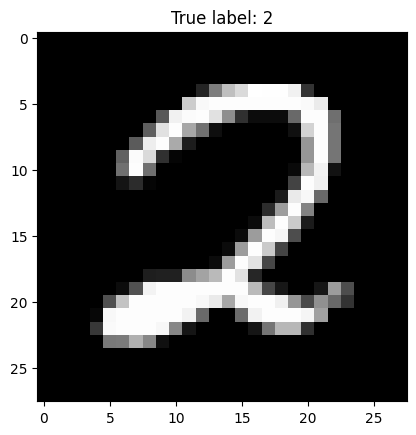

1/1 [==============================] - 0s 20ms/step
Model prediction: 2


In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Select a random image from the test set
index = 35
image = x_test[index].reshape((28, 28))
label = y_test[index].argmax()

# Display the image
plt.imshow(image, cmap='gray')
plt.title('True label: {}'.format(label))
plt.show()

# Make a prediction for the image
image = x_test[index].reshape((1, 28 * 28))
prediction = model.predict(image)
predicted_label = prediction.argmax()

print('Model prediction:', predicted_label)